<h1 style="text-align:center;vertical-align:middle">电子游戏销售分析</h1>
  
<div style="text-align:center;vertical-align:middle;margin-top:20px"><a  href = "https://github.com/PluckySaltyfish/DataMiningClass/Assignment9">仓库地址点这里</a></div>

## 目录
- [1 数据概要与预处理](#1)
    - [数据概要](#1.1)
    - [缺失值处理](#1.2)
    - [数据筛选](#1.3)
- [2 市场分析](#2)
    - [2.1 最受欢迎的游戏类型](#2.1)
    - [2.2 最受欢迎的游戏平台](#2.2)
    - [2.3 最受欢迎的游戏厂商](#2.3)
- [3 现象挖掘](#3)
    - [3.1 大众喜好的变化](#3.1)
    - [3.2 游戏平台的更替](#3.2)
    - [3.3 Nintendo开发思路的转变](#3.3)
- [4 销售量预测](#4)

<h2 id="1">1 数据概要与预处理</h2>
<h3 id="1.1">数据概要</h3>

该数据描述了全球发行量超过100000的电子游戏的销售数据。应该是截止到2016年的数据，但是由于有些游戏的预购，所以该清单还包括预发售（在当时）的一些游戏。
  
**注意** 这里所有的`Sales`指的是销售量而不是老师简介里写的销售额，因为kaggle的描述中的第一句话”video games with sales greater than 100,000 copies“，说明了这里的sale指的是copy，也就是销售的份数。
- `Rank` 总销售量的排名
- `Name` 游戏的名字
- `Platform` 发行平台
- `Year` 发行时间
- `Genre` 游戏种类
- `Publisher` 发行商
- `NA_Sales` 北美的销售量，单位为百万，下同
- `EU_Sales` 欧洲的销售量
- `JP_Sales` 日本的销售量
- `Other_Sales` 其它地区的销售量
- `Global_Sales` 全球的销售量

In [1]:
import numpy as np
import pandas as pd
root = "/root/data"
def load_data(path,filename,col):
    df = pd.read_csv(path + '/' + filename,index_col =col)
    return df

In [2]:
vgs = load_data(root,"vgsales.csv","Rank")

In [3]:
vgs.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
vgs.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

数据有10列，发行时间与发行商有缺失值。
<h3 id="1.2">缺失值处理</h3>

 - `发行时间`
  
  发行时间的缺失值处理方式如下：由于游戏主机的市场欢迎度受时间影响，由于硬件更新或新的主机发售，导致上个世代的主机便不再风靡，而一个主机上的游戏发行量最高的时期，也恰恰是该主机最风靡的时期，由此可得，按主机分类，**将对应主机中发布年份的最高频值填入缺失处**，是一种较为合理的处理方式。
 - `发行商`
  
  按主机分类，**将对应主机中发行商发行数量最高频值填入缺失处**。

In [5]:
def getYear(platform):
    return vgs[vgs["Platform"] == platform]["Year"].value_counts().index[0]
def getPublisher(platform):
    return vgs[vgs["Platform"] == platform]["Publisher"].value_counts().index[0]

In [6]:
# 发行时间缺失值填补
vgs["Year"] = vgs["Year"].fillna(getYear(vgs["Platform"]))

In [7]:
vgs["Year"].isnull().sum()

0

In [8]:
# 发行商缺失值填补
vgs["Publisher"] = vgs["Publisher"].fillna(getPublisher(vgs["Platform"]))

In [9]:
vgs["Publisher"].isnull().sum()

0

<h3 id="1.3">数据筛选</h3>
由于数据截止至2016，数据集包含部分预发售数据，为了不影响后续的分析和预测，删除预发售（当时）的数据信息。

In [10]:
# 还未发布的游戏销售数据
vgs[vgs["Year"] > 2016]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29
14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.03,0.00,0.03
16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01
16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01


In [11]:
vgs = vgs[vgs["Year"] <= 2016]

<h2 id="2">2 市场分析</h2>
<h3 id="2.1">2.1 最受欢迎的游戏类型</h3>

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

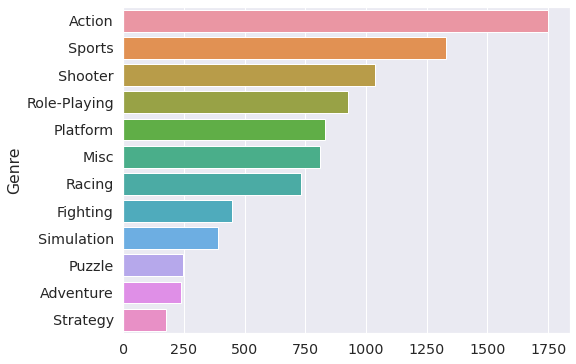

In [13]:
gg = vgs.groupby(['Genre']).sum().loc[:, 'Global_Sales'].sort_values(ascending = False)
sns.set(font_scale=1.3)
plt.figure(figsize=(8,6))
sns.barplot(y = gg.index, x = gg.values, orient='h')
plt.ylabel = "Genre"
plt.xlabel = "Global_Sales"
plt.show()

由上述直方图可以看出，在全国范围内，最受欢迎的游戏为`动作`游戏，其销售量将近17.5亿份，`运动`和`射击`类游戏也颇受欢迎，他们的销售量均超过了10亿份，相比之下`解密`，`冒险`，`策略`游戏的销量远不如其它类型的游戏高，均没有超过2.5亿。

In [14]:
gp2 = vgs.groupby(['Genre']).sum().loc[:,'NA_Sales':'Global_Sales']
gp2['NA_Sales%'] = gp2['NA_Sales']/gp2['Global_Sales']
gp2['EU_Sales%'] = gp2['EU_Sales']/gp2['Global_Sales']
gp2['JP_Sales%'] = gp2['JP_Sales']/gp2['Global_Sales']
gp2['Other_Sales%'] = gp2['Other_Sales']/gp2['Global_Sales']

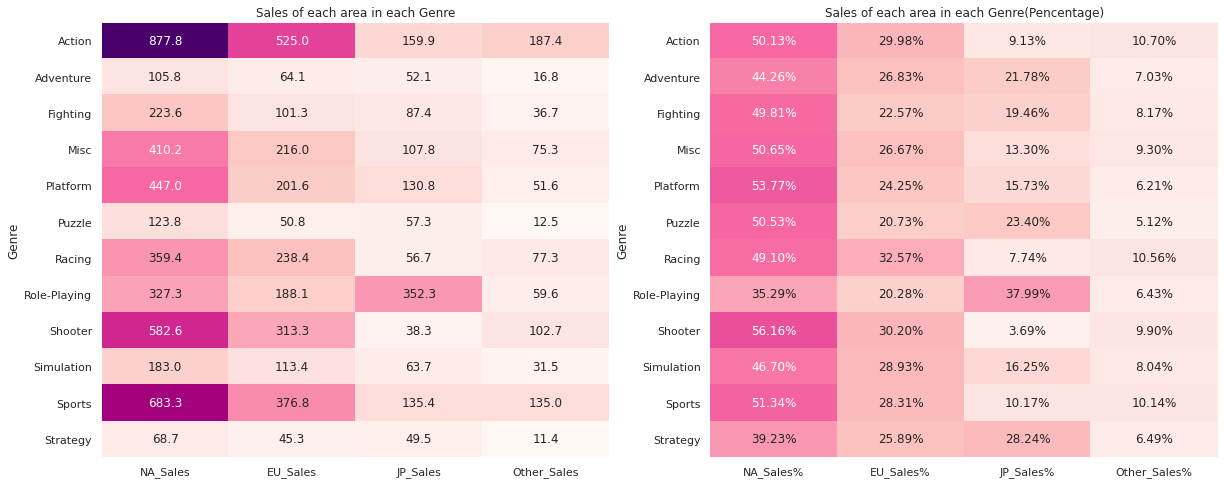

In [15]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=1)
plt.subplot(121)
sns.heatmap(gp2.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f',cmap='RdPu', cbar=False)
plt.title("Sales of each area in each Genre")
plt.subplot(122)
sns.heatmap(gp2.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%',cmap='RdPu', cbar=False)
plt.title("Sales of each area in each Genre(Pencentage)")
plt.show()

上面的热力图显示了不同地区不同种类游戏的销售量，右边显示的是不同种类游戏在不同地区销售量分布的百分比，可以发不同地区受欢迎的游戏类型并不是完全相同的，在`北美`地区，`欧洲`,以及除了日本的其它地区，最受欢迎的游戏类型是`动作`游戏，在日本最受欢迎的是`角色扮演`。

<h3 id="2.2">2.2 最受欢迎的游戏平台</h3>

**各平台下的游戏数量**

因为好的游戏平台会吸引开发者进行平台游戏开发或游戏移植，好的平台才能吸引到好的作品，所以平台下游戏的数量一定程度上能反映平台的受欢迎度，当然由于这是一个积累数据的统计，早开发出的平台由于历史的积淀也相对拥有较多的游戏。

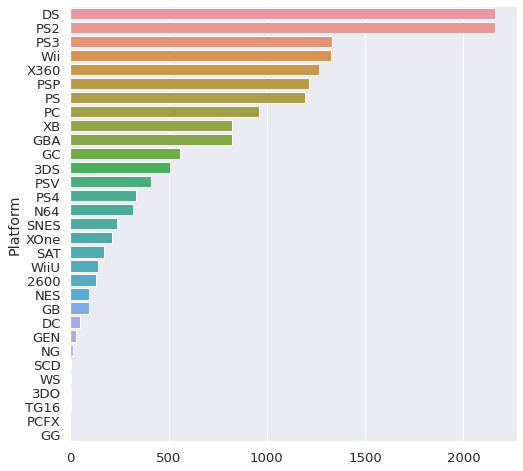

In [16]:
pg = vgs.groupby(['Platform']).count().loc[:,"Name"].sort_values(ascending = False)
plt.figure(figsize=(8,8))
sns.set(font_scale=1.2)
sns.barplot(y = pg.index, x = pg.values, orient='h')
plt.ylabel = "Platform"
plt.xlabel = "The amount of games"
plt.show()

由上图可以看出，DS和PS2上发售的游戏最多，均超过了2000，排名在前面的Wii，X360，PSP也都是比较古早的游戏平台了，所以正如之前所说，游戏的数量受历史积淀影响，并不能完全反应其受欢迎的程度（销售量同理），此时在那个时代的比较新的主机如PS4(2013)，WiiU(2012),3DS(2011)正在蓬勃发展，受欢迎游戏的数量在500及以下。而对于一些上世代的主机如GB(Game Boy)等，从1980年-2016年开始的游戏就几乎很少（小于100）在其上发售，这也说明了一代盛行游戏主机的衰落。
  
**各平台在各年发售的游戏数量**

通过各个平台中的畅销游戏在哪一年发售可以观察出在各个年代流行的平台是什么。

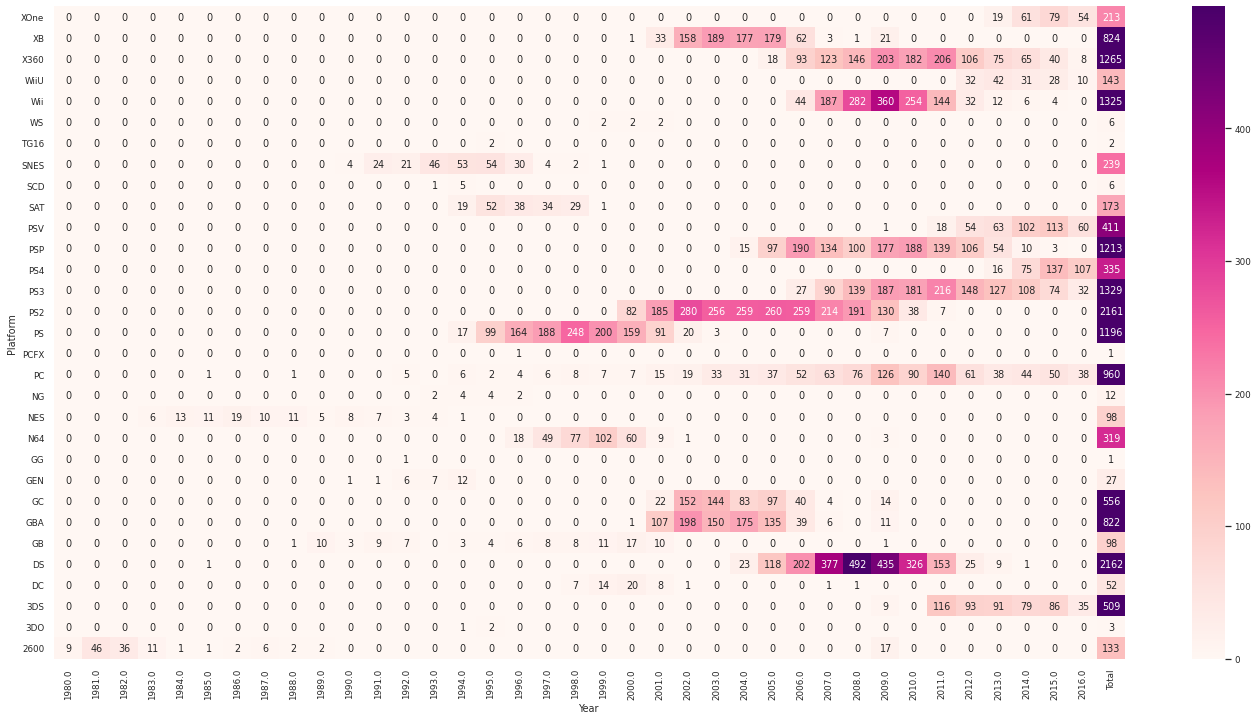

In [17]:
py = pd.crosstab(vgs.Platform,vgs.Year).sort_values(by="Platform",ascending = False)
max_c = py.values.max()
min_c = py.values.min()
py['Total'] = py.sum(axis=1)
sns.set(font_scale=0.8)
plt.figure(figsize=(24,12))
sns.heatmap(py, vmin = min_c, vmax = max_c, annot=True,cmap='RdPu', fmt="d")
plt.xticks(rotation = 90)
plt.show()

从这张图上可以的得到很多信息，我们可以一眼看出谁是上世代的主机（畅销游戏发行量几乎分布在2000年以前，如今的发售量几乎为0）：如2600、GB，GBA，GC等等；也可以看出一些后起之秀（才开始发售不久，但是在近些年却拥有许多畅销游戏，并且发展势头没有停滞），如PS4、PSV、WiiU等；还可以得出一个游戏主机的生命周期长短（4-8年），以及在数据截止收录当时那年，最受欢迎的主机（2016年畅销游戏量最多）是PS4。主机更替问题以及这张图在后续章节会展开更深的讨论。

<h3 id="2.3">2.3 最受欢迎的游戏厂商</h3>

In [18]:
pg = vgs.groupby(['Publisher']).sum().loc[:,"Global_Sales"].sort_values(ascending = False)
pg = pg[pg.values > 100]

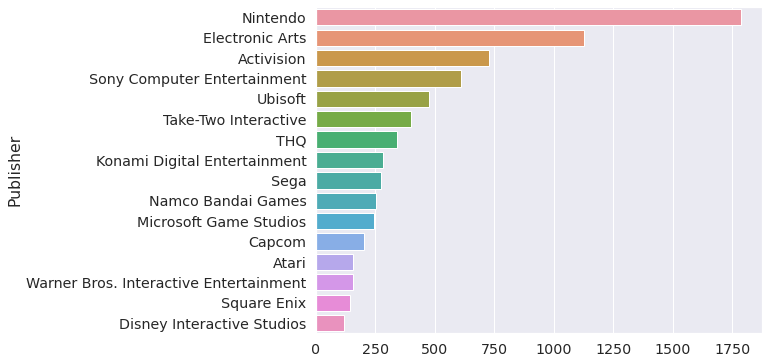

In [19]:
sns.set(font_scale=1.3)
plt.figure(figsize=(8,6))
plt.ylabel = "Top Publisher"
plt.xlabel = "Global_Sales"
sns.barplot(y = pg.index, x = pg.values, orient='h')
plt.show()

上图展现了销售量超过1亿份的各大发行商在1980-2016年畅销游戏获得的销售量，其中坐拥众多知名IP(超级马里奥，宝可梦)的任天堂(Nintendo)获得了销售量第一，其畅销游戏的销售量达到了17.5亿，也可发现游戏主机的三巨头任天堂、Sony、微软也均在此列。

In [20]:
pg = vgs.groupby(["Publisher"]).sum().loc[:,'NA_Sales':'Global_Sales']
pg = pg[pg["Global_Sales"] > 100].sort_values(by="Global_Sales",ascending = False)

In [21]:
pg['NA_Sales%'] = pg['NA_Sales']/pg['Global_Sales']
pg['EU_Sales%'] = pg['EU_Sales']/pg['Global_Sales']
pg['JP_Sales%'] = pg['JP_Sales']/pg['Global_Sales']
pg['Other_Sales%'] = pg['Other_Sales']/pg['Global_Sales']

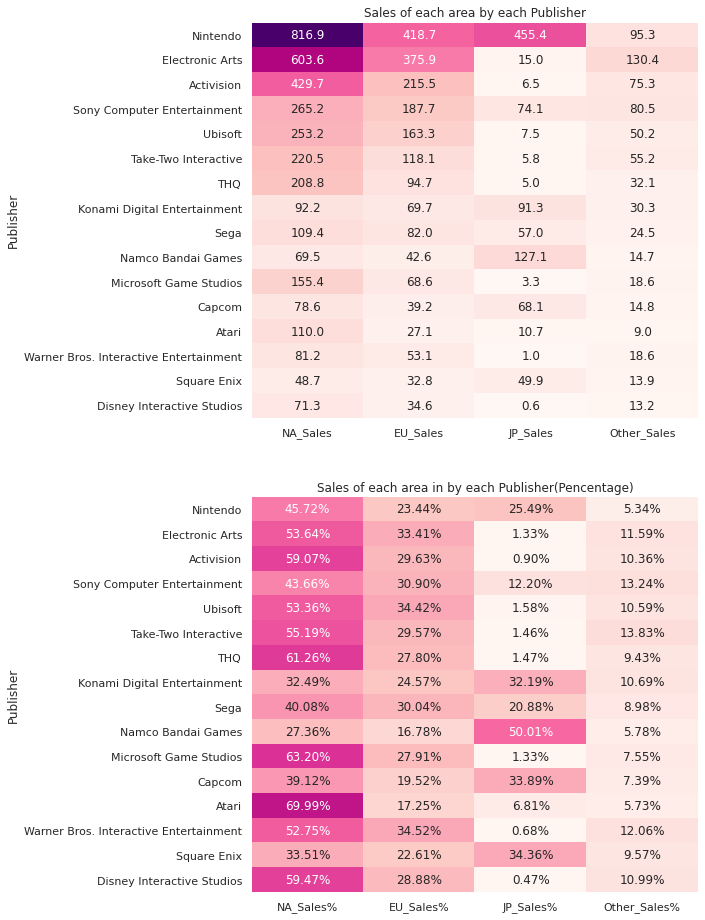

In [27]:
plt.figure(figsize=(8, 16))
sns.set(font_scale=1)
plt.subplot(211)
sns.heatmap(pg.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f',cmap='RdPu', cbar=False)
plt.title("Sales of each area by each Publisher")
plt.subplot(212)
sns.heatmap(pg.loc[:,'NA_Sales%':'Other_Sales%'], vmax =1, vmin=0, annot=True, fmt = '.2%',cmap='RdPu', cbar=False)
plt.title("Sales of each area in by each Publisher(Pencentage)")
plt.show()

上图描绘了上述几大厂商在不同地区创造的销售量，可以发现，任天堂在`北美`，`欧洲`，`日本`地区的畅销游戏销售份额均是所有厂商里最高的。对于北美的玩家来说，每个厂商的最高地区销售量大多是在北美创造的，这说明北美游戏玩家的热情很高。对于欧洲地区，各大厂商的销售份额相对平均；对于日本地区，各大厂商的销售情况差异较大，本土产业任天堂等的销售量非常之高(4.5亿)，但是对于一些美国及国外厂商：Electronic Arts，微软，迪士尼等，其销售额远不如本土产业所创造的销售额。这可能是由于，之前分析过的，日本地区的游戏受众类型和别的地区不一样，对于美国等倾向于制作动作游戏的厂商的作品，题材在日本不是很受欢迎，因此创造的销售量没有紧紧抓住本国人民胃口的本土产业的厂商创造的销售量高。
  
<h2 id="3">3 现象挖掘</h2>
<h3 id="3.1">3.1 大众喜好的变化</h3>




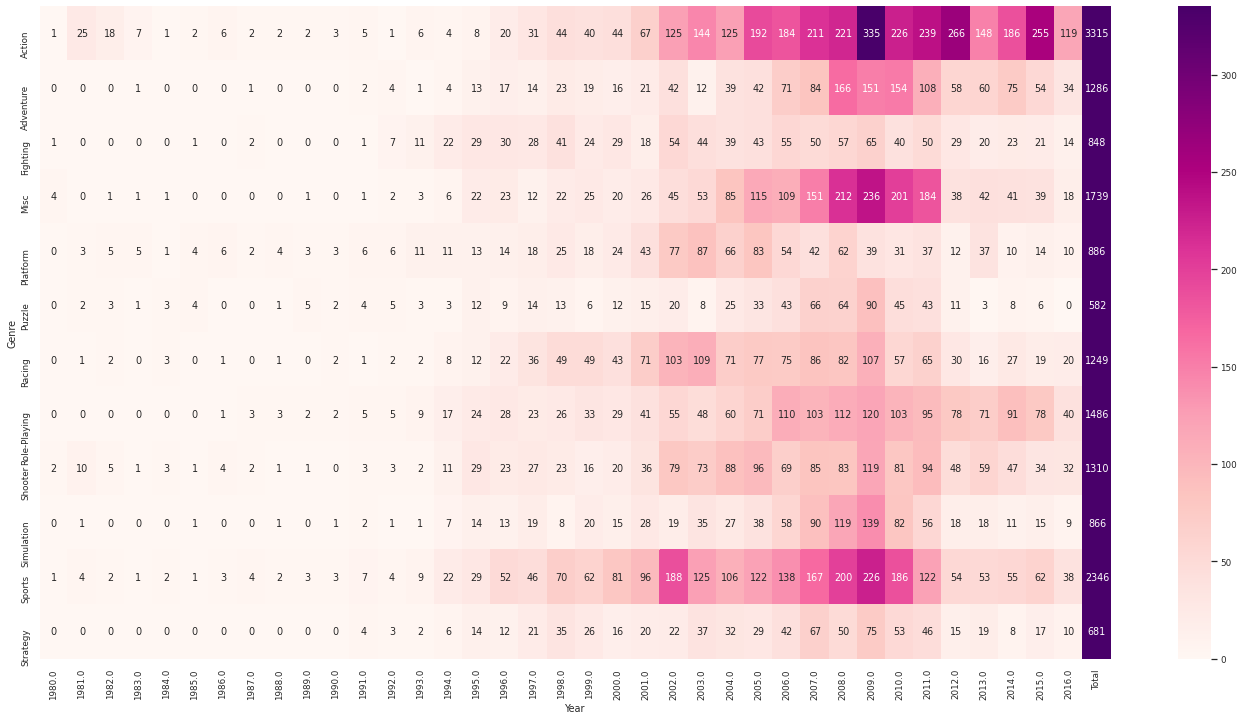

In [168]:
py = pd.crosstab(vgs.Genre,vgs.Year)
max_c = py.values.max()
min_c = py.values.min()
py['Total'] = py.sum(axis=1)
sns.set(font_scale=0.8)
plt.figure(figsize=(24,12))
sns.heatmap(py, vmin = min_c, vmax = max_c, annot=True,cmap='RdPu', fmt="d")
plt.xticks(rotation = 90)
plt.show()

<h2 id="4">4 销售量预测</h2>
建立模型，通过输入游戏类型、发行商信息、发行年数以及北美地区的销售量，预测其全球的销售量。该模型的应用场景在于厂商进行预发布后获取了部分地区的销售量而用于预测全球销售量的情形。(不选择平台作为特征是因为平台更替太快，并且发行商也蕴含着一定的平台信息)
这里选择的是回归决策树进行预测。

In [161]:
# 处理数据 将年份转换成 盈利时间（即2016-发布时间 + 1）
need = vgs.drop(["Name","Platform","EU_Sales","JP_Sales","Other_Sales"],axis = 1)
need["Year"] = 2016 - need["Year"] + 1
# 将非数值数据转换成id
from sklearn.preprocessing import LabelEncoder
need["Genre"] = le.fit_transform(need["Genre"].values)
need["Publisher"] = le.fit_transform(need["Publisher"].values)
from sklearn.utils import shuffle
need = shuffle(need)
need.head()

,Year,Genre,Publisher,NA_Sales,Global_Sales
Rank,,,,,
10339,12.0,0,275,0.10,0.11
8833,13.0,8,53,0.11,0.15
13099,11.0,2,275,0.00,0.05
4734,3.0,0,549,0.05,0.41
10952,12.0,11,138,0.01,0.09


In [162]:
# 分训练集（80%）测试集（20%）
train_size = int (len(need) * 0.8)
x_train = need.values[:train_size,:-1]
y_train = need.values[:train_size,-1]
x_test = need.values[train_size:,:-1]
y_test = need.values[train_size:,-1]

In [163]:
print("train set:",x_train.shape,y_train.shape)
print("test set:",x_test.shape,y_test.shape)

train set: (13275, 4) (13275,)
test set: (3319, 4) (3319,)


In [164]:
# 建立模型
import sklearn.tree as st
import sklearn.metrics as sm
import sklearn.ensemble as se

In [165]:
model = st.DecisionTreeRegressor(max_depth=6)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [166]:
# 预测
y_pred = model.predict(x_test)
fi = model.feature_importances_
print(fi)

[0.01010058 0.00654157 0.00529649 0.97806136]


In [167]:
# 评估
print("R2:",sm.r2_score(y_test, y_pred))
print("MSE:",sm.mean_squared_error(y_test, y_pred))

R2: 0.8790609622522769
MSE: 0.2961718398955011


模型对全球销量做出了预测，对于所选的4个特征，可以看出最重要的特征是`NA_Sales`，重要性占比98%，这几乎可以说明畅销游戏的全球销量几乎和其发布平台和游戏种类关系不大，也可能是`NA_Sales`已经包含了这些信息。
最终模型的评估结果是拟合系数R2为0.88，MSE为0.29，拟合和准确都还行。